In [1]:
from ppo import ActorCritic, PPOAgent

In [2]:
import random
import gym
import torch
import numpy as np
# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)


# Parameters
state_dim = 8
action_dim = 4
buffer_size = 5000
gamma = 0.99
K_epochs = 4
eps_clip = 0.2
max_episodes = 1500


checkpoint_path='lunar_ppo.pth'
# Instantiate the environment and the PPO agent
env = gym.make('LunarLander-v2')
env.seed(seed)
ppo = PPOAgent(state_dim, action_dim, buffer_size, gamma, K_epochs, eps_clip,hidden_dim=128)



/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/

In [3]:
def early_stopping(rewards, threshold=1000, window=5):
    if len(rewards) >= window and sum(rewards[-window:]) > threshold:
        return True
    return False


In [4]:
ppo.train(env, max_episodes=1000, early_stopping=early_stopping, checkpoint_path='ppo_checkpoint.pth')

/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1 Reward: -221.82063067711118
Episode: 2 Reward: -210.2676992405811
Episode: 3 Reward: -61.11219475790892
Episode: 4 Reward: -90.4447762908543
Episode: 5 Reward: -135.84887851916574
Episode: 6 Reward: -185.65792909099918
Episode: 7 Reward: -469.23885103750075
Episode: 8 Reward: -615.6259247668393
Episode: 9 Reward: -286.17704522875863
Episode: 10 Reward: -407.2957000697754
Episode: 11 Reward: -368.79298829046417
Episode: 12 Reward: -226.0170397180554
Episode: 13 Reward: -860.945848687768
Episode: 14 Reward: -211.13805275696112
Episode: 15 Reward: -880.3793703992521
Episode: 16 Reward: -120.9262105183476
Episode: 17 Reward: -542.3149564265703
Episode: 18 Reward: -225.32403334481347
Episode: 19 Reward: -553.5967946818013
Episode: 20 Reward: -289.1437869846438
Episode: 21 Reward: -375.07716850026895
Episode: 22 Reward: -183.5651596567206
Episode: 23 Reward: -353.9118683925494
Episode: 24 Reward: -297.9549625655268
Episode: 25 Reward: -171.9532056992532
Episode: 26 Reward: 18.0528

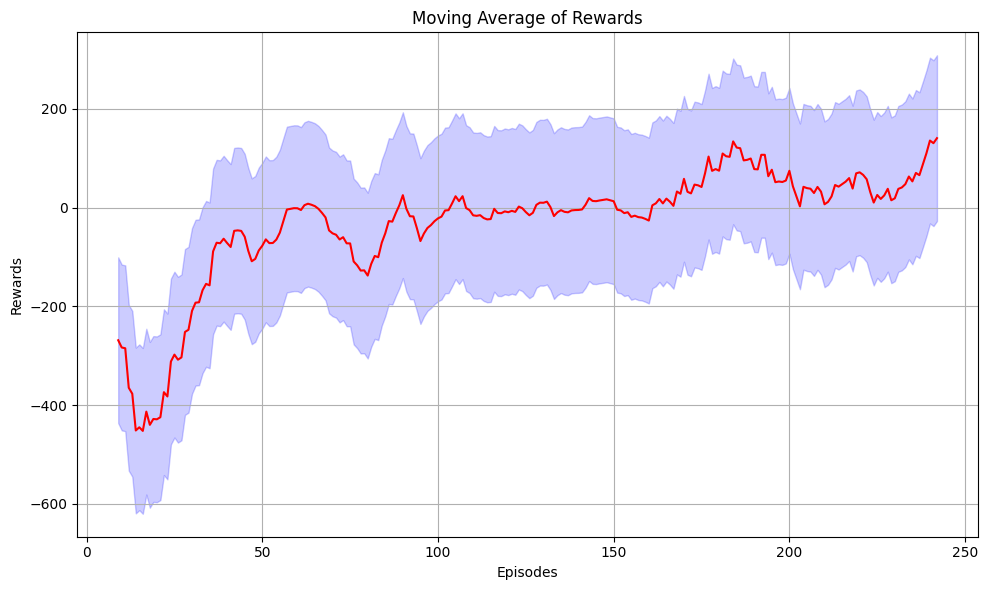

In [5]:
ppo.plot()

In [7]:
env = gym.make('LunarLander-v2',render_mode='human')
env.seed(seed)
ppo = PPOAgent(state_dim, action_dim, buffer_size, gamma, K_epochs, eps_clip)
ppo.load(checkpoint_path)
ppo.test(env,2)

Model loaded from lunar_ppo.pth
Episode 1: Total Reward: 221.722232310196
Episode 2: Total Reward: 206.74757796215908
